# 第１３回　多次元データの解析（２）　（主成分分析）

今回は、多次元データの特徴ーパターンーを捉えるための方法として、主成分分析と因子分析（参考）を取り上げます。

## 主成分分析

### 何に使うのか？

### 例：多チャンネル情報の統合

前回取り上げた重回帰分析は、２つ以上の情報（独立変数）を例えば家賃のような１つの情報（従属変数, 目的変数, 応答変数, などの別名があります）に結びつけるという情報統合の方法として理解することもできます。

そこからさらに問題を一歩進めると、いろいろな情報を最終的にそこに帰着させられる、価格のような目的変数もなく、ただ複数の情報がある場合に、どのようにそれらの情報を統合したらよいでしょうか。

#### 場面：202X年某国国境地帯

次のような状況設定を考えます。林の中に次の図で黒く塗った部分、ちょうど上から見ると階段状の形をした、物体が隠されています。それをドローンで見つけて、破壊のためにその位置を砲兵部隊に通報するのが皆さんの任務です。

一般には、リモートセンシングとよばれる分野で、人工衛星が利用されます。

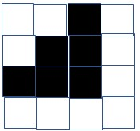

しかしこの物体にはカモフラージュがしてあるので、カラー画像では下の図のように見えます。

参考のため、描画プログラムも示します。まずモジュールのインポートです。Seabornはのちほど使います。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

次の描画部分ですが、矩形部分の色塗りに、グラフオブジェクトのaxvspan()メソッドを使います。

このメソッドの引数は、塗る領域の左端x座標、右端x座標、下端のy軸上での相対的位置、上端のy軸上での相対的位置、colorオプション、です。

colorオプションの表現は、いろいろな形式が可能ですが、今回は、RGB (Red, Green, Blue)の値を使います。これらの値は、後で説明するように、ドローンのカメラから得たものとします。

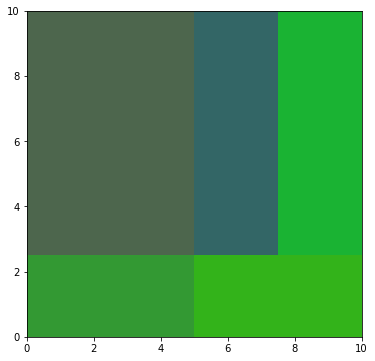

In [2]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axvspan(0, 2.5, 0.75, 1, color = (0.2,0.6,0.2))
ax.axvspan(2.5, 5, 0.75, 1, color = (0.2,0.7,0.1))
ax.axvspan(5, 7.5, 0.75, 1, color = (0.4,0.5,0.1))
ax.axvspan(7.5, 10, 0.75, 1, color = (0.2,0.5,0.3))

ax.axvspan(0, 2.5, 0.5, 0.75, color = (0.2,0.5,0.3))
ax.axvspan(2.5, 5, 0.5, 0.75, color = (0.3,0.5,0.2))
ax.axvspan(5, 7.5, 0.5, 0.75, color = (0.3,0.5,0.2))
ax.axvspan(7.5, 10, 0.5, 0.75, color = (0.2,0.7,0.1))

ax.axvspan(0, 2.5, 0.25, 5, color = (0.3,0.4,0.3))
ax.axvspan(2.5, 5, 0.25, 5, color = (0.3,0.4,0.3))
ax.axvspan(5, 7.5, 0.25, 5, color = (0.2,0.4,0.4))
ax.axvspan(7.5, 10, 0.25, 5, color = (0.1,0.7,0.2))

ax.axvspan(0, 2.5, 0, 0.25, color = (0.2,0.6,0.2))
ax.axvspan(2.5, 5, 0, 0.25, color = (0.2,0.6,0.2))
ax.axvspan(5, 7.5, 0, 0.25, color = (0.2,0.7,0.1))
ax.axvspan(7.5, 10, 0, 0.25, color = (0.2,0.7,0.1))
plt.show()

#### データ（複数チャンネルの情報）

さてここからが主成分分析の導入になります。カメラは16個のRGBの組を得ましたが、RGBを別々の変数に収めます。ch_はチャンネルの意味でつけました。一般的なリモートセンシングの世界では、それぞれのチャンネルがそれぞれのセンサーに対応します。

In [3]:
ch_r = np.array([0.2,0.2,0.4,0.2,0.2,0.3,0.3,0.2,0.3,0.3,0.2,0.1,0.2,0.2,0.2,0.2])
ch_g = np.array([0.6,0.7,0.5,0.5,0.5,0.5,0.5,0.7,0.4,0.4,0.4,0.7,0.6,0.6,0.7,0.7])
ch_b = np.array([0.2,0.1,0.1,0.3,0.3,0.2,0.2,0.1,0.3,0.3,0.4,0.2,0.2,0.2,0.1,0.1])

各チャンネルデータを表示するにあたって、上の画像と同じ形に見えるように、4行4列の行列にします。

In [4]:
map_r = np.reshape(ch_r,[4,4])
map_g = np.reshape(ch_g,[4,4])
map_b = np.reshape(ch_b,[4,4])

In [5]:
map_r

array([[0.2, 0.2, 0.4, 0.2],
       [0.2, 0.3, 0.3, 0.2],
       [0.3, 0.3, 0.2, 0.1],
       [0.2, 0.2, 0.2, 0.2]])

In [6]:
map_g

array([[0.6, 0.7, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.7],
       [0.4, 0.4, 0.4, 0.7],
       [0.6, 0.6, 0.7, 0.7]])

In [7]:
map_b

array([[0.2, 0.1, 0.1, 0.3],
       [0.3, 0.2, 0.2, 0.1],
       [0.3, 0.3, 0.4, 0.2],
       [0.2, 0.2, 0.1, 0.1]])

次の行は検算用です。

In [8]:
np.sum([ch_r + ch_g + ch_b], axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

チャンネルごとに表示しますと、最初に見たのっぺりとした感じではなく、ヴァリエーションがあることがわかります。  
しかし、どのチャンネルも、単独では、隠された物体を再現するだけの情報がありません。

<AxesSubplot:>

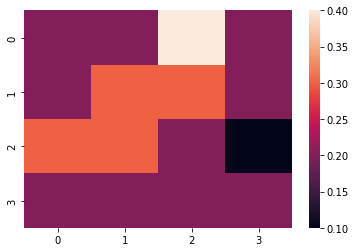

In [9]:
sns.heatmap(map_r)

<AxesSubplot:>

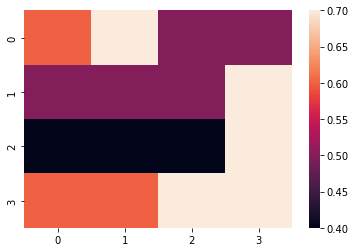

In [10]:
sns.heatmap(map_g)

<AxesSubplot:>

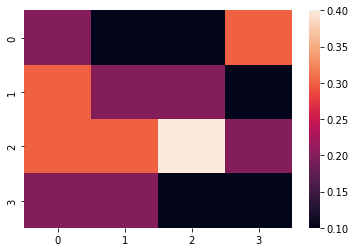

In [11]:
sns.heatmap(map_b)

#### チャンネルの統合（ミックス）

そこで、各チャンネルの値をひとつにミックスすることを試みます。つまり、それぞれ何倍かして足す、つまり線形変換を、行いました。試行錯誤の末、つぎのように変換すると、隠してある物体の形が浮き上がりました。

$$\boldsymbol{Y} = \left[\begin{array}{c}1 \; -1  \; -2  \end{array}\right] \left[\begin{array}{c} R\\ G\\ B\end{array}\right] = \boldsymbol{R} - \boldsymbol{G} - 2\boldsymbol{B}$$

<AxesSubplot:>

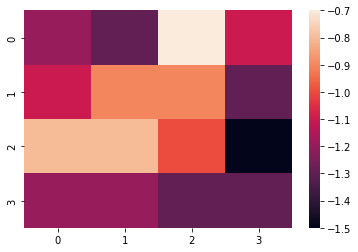

In [12]:
sns.heatmap(map_r - map_b - 2*map_g)

これの問題点は、まず、試行錯誤に時間がかかるということですが、そもそも答えを知っているからできることだということです。つまり、答え（どんな形の物体が隠れているか）を知らなければお手上げです。

RGBのもとの値を変換するベクトル$\left[\begin{array}{c}1 \; -1 \; -2\end{array}\right]$に相当するものを自動的に見つける必要があります。

#### pcaを用いた主成分分析（PCA）

主成分分析（Principal Component Analysis, PCA）でこの問題に取り組みましょう。

PCAを行うPythonのモジュールはいろいろありますが、今回はpca (URLは次のセルに示します)を用います。pipによるPCAのインストールについてはこの資料の下の方で紹介しています。この演習の時間内では、実行していただく時間がないので、後で各自実行してください。

https://erdogant.github.io/pca/pages/html/index.html

In [13]:
from pca import pca

RGBのチャンネルデータをPandasのデータフレームにします。

In [14]:
df_sensor = pd.DataFrame({'Ch_R':ch_r, 'CH_G':ch_g, 'CH_B':ch_b})

これらの変数どうしの相関を調べます。まずこれらの変数の共分散行列を求めます。Pandasデータフレームのcov()メソッドを使います。

In [15]:
df_sensor.cov()

,Ch_R,CH_G,CH_B
Ch_R,0.004958,-0.004750,-0.000208
CH_G,-0.004750,0.013167,-0.008417
CH_B,-0.000208,-0.008417,0.008625


相関係数は次のようになります。Pandasデータフレームのcorr()メソッドを使います。

In [18]:
df_sensor.corr()

,Ch_R,CH_G,CH_B
Ch_R,1.000000,-0.587879,-0.031857
CH_G,-0.587879,1.000000,-0.789810
CH_B,-0.031857,-0.789810,1.000000


このように、RGBどうしに互いに負の相関がある（ただしRとBとの相関はたいへん弱い）ことがわかります。

ここから、プログラムpcaを用いたPCAの手順です。  
次のような手順で行います。
- データの標準化＝平均を引き、標準偏差で割ることで各変数のスケールを同じにする（今回はおこないません。ただし、平均を引くことは、プログラムpcaが勝手に行っていることがあとでわかります）
- pca()コマンドによるモデルの初期化
- モデルに対するfit_transform()メソッドの実行。ここで、データフレームを与えます。
- 結果の表示、結果の構成要素の取り出し。

次の２つのセルは、モデルの初期化とfit_transform()メソッドの実行です。

モデルの初期化では、チャンネルの数は３個ですので主成分の数も３つにします。

In [18]:
model_02 = pca(n_components=3)

In [19]:
result_02 = model_02.fit_transform(df_sensor)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


結果から、主成分ベクトル（'PC'）を取り出します。PC1, PC2, PC3がそれぞれ第１，第２，第３主成分です。

これらの値は、主成分分析によってもとのRGB値を変換した値です。見てわかるように、第３主成分はたいへん小さく、無視できそうなほどです。つまり、主成分分析によって、もとの３つの変数が２つに減らせたことになります。

In [20]:
result_02['PC']

,PC1,PC2,PC3
0,-0.040659,-0.027726,-7.978280e-19
1,-0.176072,0.013057,-2.716132e-17
2,0.029979,0.206817,5.942514e-19
3,0.094754,-0.068509,1.040834e-17
4,0.094754,-0.068509,1.040834e-17
5,0.062367,0.069154,-3.641472e-19
6,0.062367,0.069154,-3.641472e-19
7,-0.176072,0.013057,-2.716132e-17
8,0.197780,0.028371,1.040834e-17
9,0.197780,0.028371,1.040834e-17


出力結果にはどれだけの項目があるのか、一覧を表示してみます。

In [21]:
print(result_02)

{'loadings':          Ch_R      CH_G      CH_B
PC1  0.235460 -0.794796  0.559336
PC2  0.781809 -0.186990 -0.594819
PC3  0.577350  0.577350  0.577350, 'PC':          PC1       PC2           PC3
0  -0.040659 -0.027726 -7.978280e-19
1  -0.176072  0.013057 -2.716132e-17
2   0.029979  0.206817  5.942514e-19
3   0.094754 -0.068509  1.040834e-17
4   0.094754 -0.068509  1.040834e-17
5   0.062367  0.069154 -3.641472e-19
6   0.062367  0.069154 -3.641472e-19
7  -0.176072  0.013057 -2.716132e-17
8   0.197780  0.028371  1.040834e-17
9   0.197780  0.028371  1.040834e-17
10  0.230168 -0.109292  6.016910e-17
11 -0.143685 -0.124606 -2.204819e-17
12 -0.040659 -0.027726 -7.978280e-19
13 -0.040659 -0.027726 -7.978280e-19
14 -0.176072  0.013057 -2.716132e-17
15 -0.176072  0.013057 -2.716132e-17, 'explained_var': array([0.76624581, 1.        , 1.        ]), 'variance_ratio': array([0.76624581, 0.23375419, 0.        ]), 'model': PCA(n_components=3), 'scaler': None, 'pcp': 1.0, 'topfeat':     PC feature   loa

これらの中で重要なものとして、'loadings'（因子負荷量）があります。第１～第３主成分をつくるために、RGBの値をどのようにミックスしたらよいかーどのように線形結合させたらよいかーを表します。

In [22]:
result_02['loadings']

,Ch_R,CH_G,CH_B
PC1,0.235460,-0.794796,0.559336
PC2,0.781809,-0.186990,-0.594819
PC3,0.577350,0.577350,0.577350


また、第１，第２、第３主成分を順番に取り入れていくことで、もとのデータに含まれる分散のどれだけが表現できるかの指標（寄与率）は、'variance_ratio'の項目にあります。累積寄与率は'explained_var'の項目にあります。

In [23]:
result_02['variance_ratio']

array([0.76624581, 0.23375419, 0.        ])

つまり、第１主成分でもとのデータの76.6%の、第２主成分でもとのデータの23.3%の、分散が説明できるので、この２つでほとんどすべての分散を説明できることになります。

第１主成分の割合でRGB値をミックスした値を図示します。つまり、両者の内積、すなわち、RGB値のベクトルを第１主成分のベクトルの方向の軸上に射影したときの座標、です。図示には、Seabornのheatmap()関数を用います。

<AxesSubplot:>

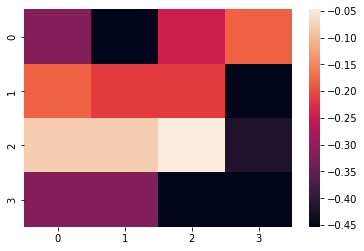

In [25]:
sns.heatmap(0.235*map_r - 0.795*map_g +0.559*map_b)

上の式で計算した座標と、pcaによるPCAの結果得られた第一主成分軸の値とは同じでしょうか？次で示すように、result_02['PC']['PC1']で各データを変換した結果の、第一主成分軸のデータフレームが得られ、その.values属性で値が得られます。それを4x4行列に変換して表示します。一見同じですがスケールが違います。

<AxesSubplot:>

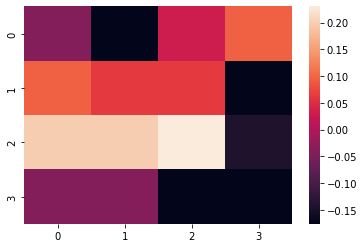

In [48]:
sns.heatmap(np.reshape(result_02['PC']['PC1'].values,[4,4]))

これは、平均をひいた値をかけているためだと思われます。実際、次の２つは同じ結果となります。

まず、pcrの出力から、第１主成分軸の座標を取り出します。

In [79]:
result_02['PC']['PC1'].values

array([-0.04065885, -0.17607213,  0.0299792 ,  0.09475443,  0.09475443,
        0.06236681,  0.06236681, -0.17607213,  0.19778009,  0.19778009,
        0.2301677 , -0.14368451, -0.04065885, -0.04065885, -0.17607213,
       -0.17607213])

それに対して、第１主成分を$\boldsymbol{u_1}$、データを$\boldsymbol{X}$、そのチャンネルごとの平均を$\boldsymbol{M}$としたときの、$\boldsymbol{u_1}^T (X - M)$は次のようになります。

In [81]:
np.dot(result_02['loadings'].loc['PC1'].values,(df_sensor - df_sensor.mean(axis=0)).values.T)

array([-0.04065885, -0.17607213,  0.0299792 ,  0.09475443,  0.09475443,
        0.06236681,  0.06236681, -0.17607213,  0.19778009,  0.19778009,
        0.2301677 , -0.14368451, -0.04065885, -0.04065885, -0.17607213,
       -0.17607213])

それらが一致するのがわかりました。

さて、第１主成分のときと同様に、第２主成分の割合でRGB値をミックスした値を図示します。

<AxesSubplot:>

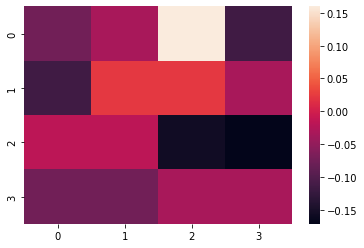

In [68]:
sns.heatmap(0.782*map_r - 0.187*map_g  - 0.594*map_b)

これら２種類のミックス値を重ねます。つまり、各領域における２種類のミックス値の和を求めます。すると、試行錯誤してミックスの方法を見つけたときより大きなコントラストで、隠された物体の形が明らかになりました。

<AxesSubplot:>

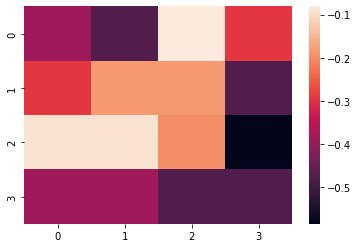

In [25]:
sns.heatmap(1.02*map_r - 0.97*map_g -0.04*map_b)

このように、主成分分析によって、異なる情報源からの情報を、それらに含まれる分散をできるだけたくさん引き出すような形で、統合することができます。

### 練習問題

ごく簡単な例を示します。次のような体重と身長との関係があるとします。（David C. Lay "Linear Algebra and its Applications. Addison-Wesley (2000)"より）

|生徒|体重（lb.）|身長（in.）|
|--|--|--|
|#1|120|61|
|#2|125|60|
|#3|125|64|
|#4|135|68|
|#5|145|72|

まずはこのデータをプロットしてみます。最初にモジュールをインポートします。

In [29]:
import numpy as np
from scipy import stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

上の表のデータです。

In [30]:
weight = np.array([120,125,125,135,145])
height = np.array([61,60,64,68,72])

データフレームを作るための関数はpandas.DataFrame()で、引数は辞書型だということは前回説明しました。

In [31]:
df_01 = pd.DataFrame({'Weight':weight,'Height':height})
df_01

,Weight,Height
0,120,61
1,125,60
2,125,64
3,135,68
4,145,72


データフレームのメソッドで散布図が描けます。この関係があるとき、主成分分析によって２つある変数を済ませることを目標とします。

<AxesSubplot:xlabel='Weight', ylabel='Height'>

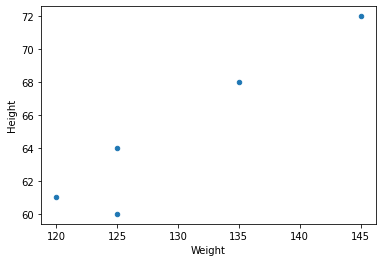

In [32]:
df_01.plot.scatter('Weight','Height')

#### 主成分分析に使うデータの標準化

平均値を引いた値に変換します。できれば、標準化する（平均値を引き、標準偏差で割る）ことが望ましいとされています。

平均値は次のとおりです。

In [33]:
df_01_m = df_01.mean()
df_01_m

Weight    130.0
Height     65.0
dtype: float64

データから平均値をひいたら次のようになります。Numpy配列の「ブロードキャスト」機能はデータフレームでも働きます。

In [35]:
df_01_sub = df_01 - df_01_m
df_01_sub

,Weight,Height
0,-10.0,-4.0
1,-5.0,-5.0
2,-5.0,-1.0
3,5.0,3.0
4,15.0,7.0


#### 共分散行列の作成

データフレームのメソッドで共分散行列が得られます。ただし、$n$ではなく$n - 1$で割ったもの（不偏分散）です。

In [37]:
df_01_cov = df_01_sub.cov()
df_01_cov

,Weight,Height
Weight,100.0,47.5
Height,47.5,25.0


#### 共分散行列の固有ベクトルと固有値

共分散行列の固有値が大きい順に、固有ベクトルを第１主成分、第２主成分、、、、とします。この場合、変数は２つですから、固有ベクトルは２つです。

次の式で、eig_valには２つの固有値が入り、eig_vecの２つの列ベクトルが、順に、それぞれの固有値に対応する固有ベクトルです。

In [38]:
[eig_val,eig_vec] = np.linalg.eig(df_01_cov)

In [39]:
eig_val

array([123.01859218,   1.98140782])

In [40]:
eig_vec

array([[ 0.89990119, -0.43609386],
       [ 0.43609386,  0.89990119]])

つまり、固有値$\lambda_1 = 123.02$に対応する固有ベクトル$\boldsymbol{u_1} = \left[\begin{array}{c}0.900\\ \; 0.436 \end{array}\right]$で、固有値$\lambda_2 = 1.98$（小さい！）に対応する固有ベクトル$\boldsymbol{u_2} = \left[\begin{array}{c}-0.436\\ \; 0.900 \end{array}\right]$です。対称行列の固有ベクトルですから、互いに直交します。

#### データの変換（主成分軸上での座標の取得）

$\boldsymbol{u_1}^T\left[\begin{array}{c}Weight\\ Height\end{array}\right] = 0.9 \times Weight + 0.436 \times Height$で各データの第１主成分軸上での座標値が得られます。

同様に、$\boldsymbol{u_2}^T\left[\begin{array}{c}Weight\\ Height\end{array}\right] = -0.436 \times Weight + 0.9 \times Height$で各データの第２主成分軸上での座標値が得られます。

In [54]:
[c_1,c_2] = np.dot(eig_vec.T,[weight,height])

各座標の値です。

In [55]:
c_1

array([134.58986783, 138.6532799 , 140.39765534, 151.14104265,
       161.88442995])

In [56]:
c_2

array([ 2.562709  , -0.51766149,  3.08194325,  2.32060939,  1.55927552])

#### 寄与率の計算

変換されたデータの共分散行列を求めると、対角成分以外が0（一見0でないですが、誤差と考えられます）になりました。つまり、データの分散はすべてこれらの座標値に集約されました。また、対角成分が固有値になっているのがわかります。

In [58]:
np.cov(np.array([c_1,c_2]))

array([[1.23018592e+02, 1.58187873e-14],
       [1.58187873e-14, 1.98140782e+00]])

そして、次に示すように、第１主成分軸上での分散がデータの分散のほとんどを説明しています。

In [10]:
np.var(c_1)/(np.var(c_1) + np.var(c_2))

0.9841487374764081

In [11]:
eig_val[0]/sum(eig_val)

0.9841487374764082

#### 新しい座標での図示

散布図でこれらの座標を図示すると、ほとんど、横軸（第１主成分軸）と平行に点が散らばっているのがわかります。縦軸とのスケールの違いに注意してください。

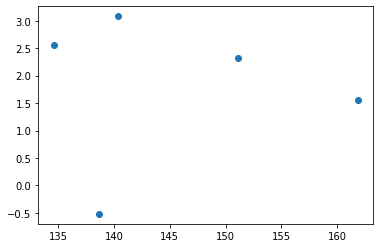

In [60]:
plt.scatter(c_1,c_2)

#### pcaを使った解法

同じ問題をpcaを使って解いてみましょう。まず、pcaをインストールします。

In [29]:
pip install pca

Note: you may need to restart the kernel to use updated packages.Collecting pca


You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 78.4/78.4 KB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=8324433f422ba25c36874fb05be5b705dc154b22c3fff909d824f6ab6c37b512
  Stored in directory: c:\users\hishiki\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=f800c9eb507e8cc930f7d4597673ee5c22e1fc5918eabdc2059a711319f8d00d
  Stored in directory: c:\users\hishiki\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built sklearn wget


pcaをインポートします。

In [18]:
from pca import pca 

最初の例と同様のステップで進めます。まずモデルの初期化をします。

In [61]:
model_01 = pca(n_components=2)

次にPCAを実施します。

In [109]:
result_01 = model_01.fit_transform(df_01)

[pca] >Cleaning previous fitted model results..
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [2] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


'loadings'の項目を見ると、PC1, PC2の因子負荷量がそれぞれ上の$\boldsymbol{u_1}$、$\boldsymbol{u_2}$に対応していることがわかります。

In [64]:
result_01['loadings']

,Weight,Height
PC1,0.899901,0.436094
PC2,0.436094,-0.899901


それぞれの累積寄与率

In [67]:
result_01['explained_var']

array([0.98414874, 1.        ])

result_01['variance_ratio']

新たな軸での座標は次のようになります。

In [90]:
result_01['PC']

,PC1,PC2
0,-10.743387,-0.761334
1,-6.679975,2.319037
2,-4.935600,-1.280568
3,5.807788,-0.519234
4,16.551175,0.242100


これらは、平均をひいた値に主成分ベクトルを係数としてかけた（つまり内積を計算した）値であることを確かめます。

In [98]:
df_01_sub # 平均をひいた値

,Weight,Height
0,-10.0,-4.0
1,-5.0,-5.0
2,-5.0,-1.0
3,5.0,3.0
4,15.0,7.0


In [97]:
np.dot(result_01['loadings'].values,df_01_sub.values.T)

array([[-10.7433873 ,  -6.67997523,  -4.93559979,   5.80778751,
         16.55117482],
       [ -0.76133387,   2.31903662,  -1.28056812,  -0.51923425,
          0.24209962]])

それを認識した上で、新しい座標をプロットします。

[pca] >Plot PC1 vs PC2 with loadings.


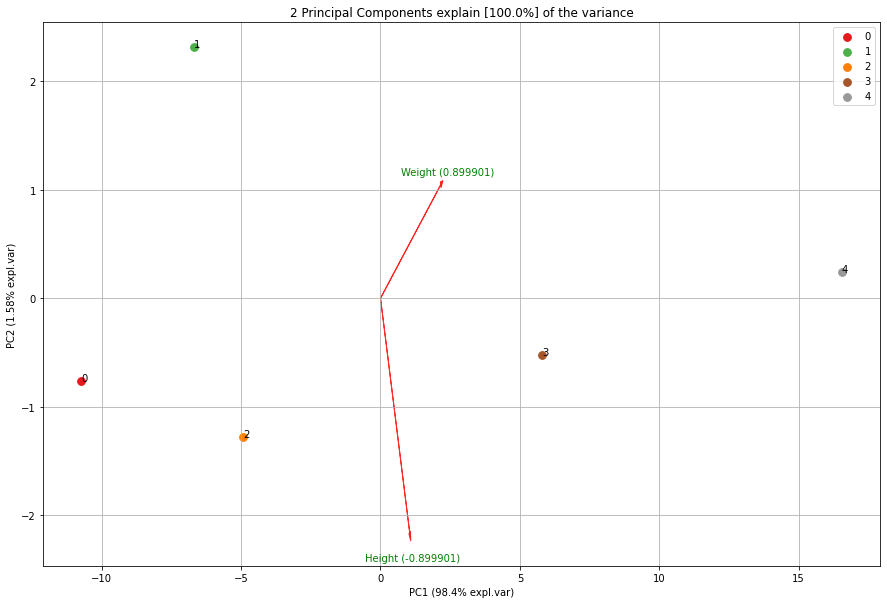

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'2 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (98.4% expl.var)', ylabel='PC2 (1.58% expl.var)'>)

In [99]:
model_01.biplot()

ここには、各データが新しい座標でプロットされます。また、もとの軸WeightとHeightの相対的な位置が表示されます。

## 因子分析

次のようなテストの点数を考えます。（金明哲　「Rによるデータサイエンス」（森北出版, ２００７年）より）

|受験者|数学|理科|国語|英語|社会|
|--|--|--|--|--|--|
|A|89|90|67|46|50|
|B|57|70|80|85|90|
|C|80|90|35|40|50|
|D|40|60|50|45|55|
|E|78|85|45|55|60|
|F|55|65|80|75|85|
|G|90|85|88|92|95|

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
math = np.array([89,57,80,40,78,55,90])
science = np.array([90,70,90,60,85,65,85])
japanese = np.array([67,80,35,50,45,80,88])
english = np.array([46,85,40,45,55,75,92])
social = np.array([50,90,50,55,60,85,95])
df_exam = pd.DataFrame({'Math':math, 'Science':science,'Japanese':japanese,'English':english,'Social':social})

各科目の平均点は次のようになります。

In [9]:
df_exam_mean = df_exam.mean(axis=0)
df_exam_mean

Math        69.857143
Science     77.857143
Japanese    63.571429
English     62.571429
Social      69.285714
dtype: float64

### 主成分分析からのアプローチ

主成分分析で分析してみましょう

In [4]:
from pca import pca
model_03 = pca()
result_03 = model_03.fit_transform(df_exam)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


主成分の数を指定しないと、95%の分散を説明するだけの主成分を出力します。このデータでは第２主成分まで出力しました。

第１主成分、第２主成分を軸とすると、新しい座標は次のとおりです。

これらの値は、各人の得点ベクトルから、各教科の平均値を引いたあとで、それぞれ第１主成分、第２主成分のベクトルをかけた（内積をとった）ものであることは、前項と同様です。

In [7]:
result_03['PC']

,PC1,PC2
0,-21.210977,-21.477155
1,35.714601,11.689593
2,-42.070444,-10.531628
3,-22.743706,37.148820
4,-21.222568,-8.363796
5,27.549782,16.816522
6,43.983311,-25.282356


プロットしましょう。

[pca] >Plot PC1 vs PC2 with loadings.


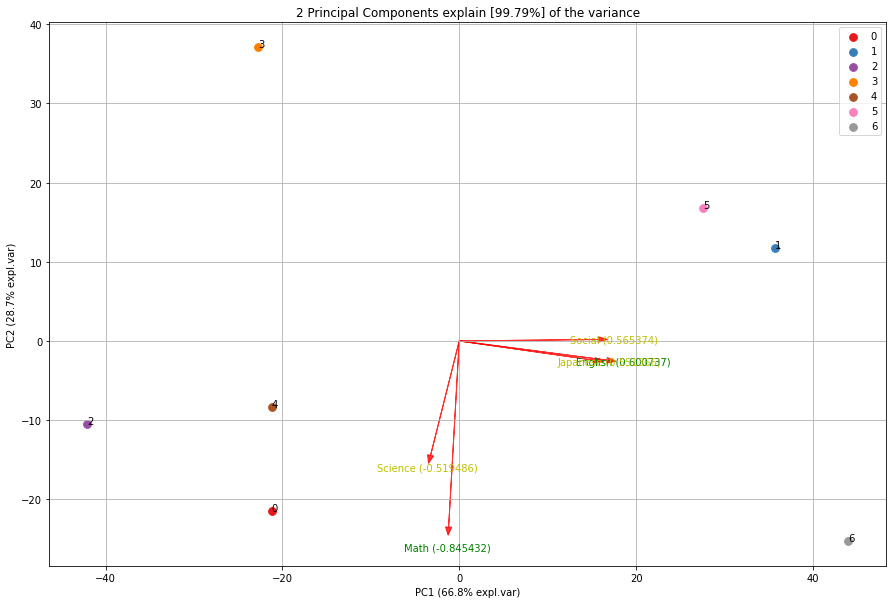

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'2 Principal Components explain [99.79%] of the variance'}, xlabel='PC1 (66.8% expl.var)', ylabel='PC2 (28.7% expl.var)'>)

In [5]:
model_03.biplot()

この図で注目すべきところは、国語（Japanese）、社会（Social）、英語（English）は第一主成分でよく説明され、数学（Math）と理科（Science）は第２主成分でよく説明されるということです。

実際、因子負荷量は次のようになります。

In [6]:
result_03['loadings']

,Math,Science,Japanese,English,Social
PC1,-0.043185,-0.116610,0.551366,0.600737,0.565374
PC2,-0.845432,-0.519486,-0.087920,-0.087201,0.006674


ですから、第１主成分を「文系軸」、第２主成分を「理系軸」と呼ぶことも可能でしょう。

では、各人の成績を「理系軸ｘA　＋　文系軸ｘB」というふうに再現することができるでしょうか？

上のPC1, PC2は互いに直交な単位ベクトル$\boldsymbol{u_1}^T$、$\boldsymbol{u_2}^T$で、点数ベクトル$\boldsymbol{X}$とそのPC1軸、PC2軸の座標$\boldsymbol{Y}$との関係は、

$\boldsymbol{Y} = \left[\begin{array}{c}\boldsymbol{u_1}^T \\ \boldsymbol{u_2}^T\end{array}\right]\boldsymbol{X}$

の関係がありますから

$\boldsymbol{X} = \left[\begin{array}{c}\boldsymbol{u_1} \; \boldsymbol{u_2} \end{array}\right]\boldsymbol{Y}$

によってもとの点数を復元できます。この$\boldsymbol{Y}$の要素である数値、つまり、PC1軸の座標とPC2軸の座標が上のAとBです。

### 因子分析の考え方

因子分解では、より自由な形を許容します。すなわち、$$\boldsymbol{X} = \boldsymbol{a}\boldsymbol{f} + \boldsymbol{e}$$のような形です。このとき、$\boldsymbol{f}$をそれぞれの個体の因子得点（factor score）、共通因子の係数$\boldsymbol{a}$を因子負荷量、$\boldsymbol{e}$を独自因子といいます。

### factor_analyzerによる因子分析

まず、factor_analyzerをインストールします。

In [113]:
pip install factor_analyzer

You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.


     -------------------------------------- 41.7/41.7 KB 498.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=57581636e6a77108e7e3efada699d59fdb339416e911fc44d7beadc16fbf99e4
  Stored in directory: c:\users\hishiki\appdata\local\pip\cache\wheels\c4\c5\20\f59c259c406007a587ff4a0d0e6212ae14f9558a0124463545
Successfully built factor_analyzer


In [ ]:
pip show factor_analyzer

Note: you may need to restart the kernel to use updated packages.Name: factor-analyzer

Version: 0.4.0
Summary: A Factor Analysis class
Home-page: https://github.com/EducationalTestingService/factor_analyzer
Author: Jeremy Biggs
Author-email: jbiggs@ets.org
License: UNKNOWN
Location: e:\pythonusb\pythonusb\python\python-3.9.9\lib\site-packages
Requires: numpy, pandas, scikit-learn, scipy
Required-by: 


それでは、インポートします。

In [1]:
from factor_analyzer import FactorAnalyzer 

因子分析を行う際に、データができるだけ１つの因子で表せるように、因子負荷量$\boldsymbol{a}$の回転を行うオプション「rotation="varimax"」をつけます。また、因子の数を２つに指定するためにオプション「n_factors=2」をつけます。

In [61]:
fa=FactorAnalyzer(rotation="varimax",n_factors=2)

In [62]:
fa.fit(df_exam)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

因子負荷量を表示します。第１軸は国語、英語、社会のウェイトが高く、第２軸は数学と理科のウェイトが高いのがわかります。

In [63]:
fa.loadings_

array([[ 0.0586396 ,  0.99639872],
       [-0.19278659,  0.97023151],
       [ 0.87355798, -0.04515192],
       [ 0.999463  , -0.03412303],
       [ 0.97817648, -0.13345814]])

どの程度の分散がカバーされるかを表示します。３つめが累積の分散です。

In [66]:
fa.get_factor_variance()

(array([2.75946434, 1.95517374]),
 array([0.55189287, 0.39103475]),
 array([0.55189287, 0.94292762]))

データを１軸と２軸に変換した結果です。

In [67]:
exam_transformed = fa.transform(df_exam)
exam_transformed

array([[-0.82411161,  0.99735402],
       [ 0.88377924, -0.77704213],
       [-1.3835613 ,  0.66173418],
       [-0.77976512, -1.62050866],
       [-0.1526514 ,  0.58344466],
       [ 0.54305655, -0.91790955],
       [ 1.71325364,  1.07292749]])

１軸に人文、２軸に科学のラベルをつけます。行ラベルに学生の番号をつけます。

In [69]:
df_exam_transformed = pd.DataFrame(data=exam_transformed,index=['1','2','3','4','5','6','7'],columns=['HUM','SCI'])
df_exam_transformed

,HUM,SCI
1,-0.824112,0.997354
2,0.883779,-0.777042
3,-1.383561,0.661734
4,-0.779765,-1.620509
5,-0.152651,0.583445
6,0.543057,-0.917910
7,1.713254,1.072927


散布図を描きます。

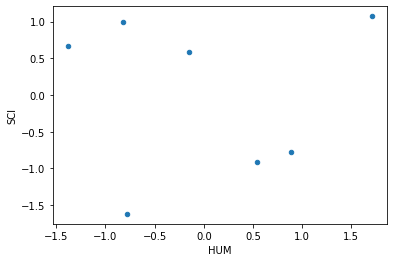

In [83]:
a = df_exam_transformed.plot.scatter('HUM','SCI')

In [90]:
np.linalg.norm([0.3616,0.6565,-0.5810,0.3173])

0.9999935499791985